**Data Description:** 
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Context:** 
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

In [39]:
#Importing all the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#Reading the dataset and seeing the top 5 rows
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [41]:
#To check the number of Rows and Columns
df.shape

(5000, 14)

In [42]:
#To check about Null Values in the dataset
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [43]:
#To check the name of the columns in the dataset.
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [44]:
#Dropping unwanted columns
df.drop(['ID','ZIP Code'], axis=1, inplace=True)

In [45]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [46]:
#To plot the Summary in a boxplot form
import plotly.express as ps

fig = ps.box(df, y = ['Age', 'Experience', 'Income', 'Family', 'Education'] )

fig.show()

In [47]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

C:\Users\thanu\AppData\Local\Temp\ipykernel_42104\4088753809.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Experience', ylabel='Density'>

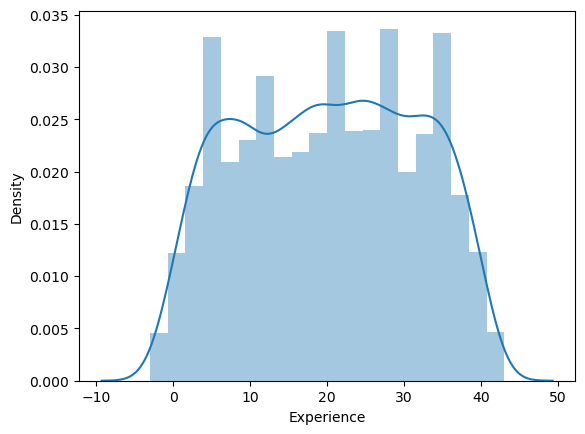

In [48]:
sns.distplot(df['Experience'])

In [49]:
#To find the mean of Experience
df['Experience'].mean()

20.1046

In [50]:
#To find the negative experience
negative_exp = df[df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [51]:
#To check the number of rows and columns negative experience data exists
negative_exp.shape

(52, 12)

C:\Users\thanu\AppData\Local\Temp\ipykernel_42104\3268055496.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

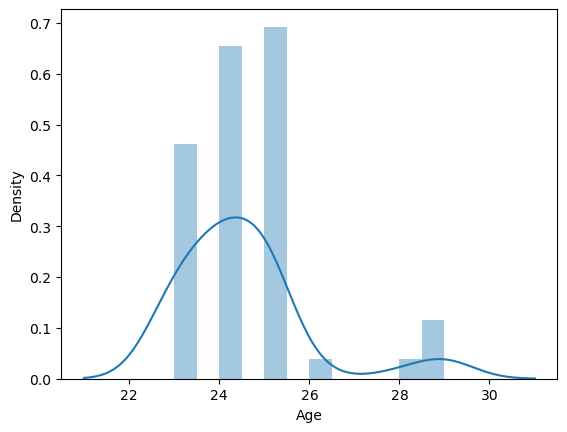

In [52]:
sns.distplot(negative_exp['Age'])

In [53]:
#To check the mean of the negative experience
negative_exp['Experience'].mean()


-1.4423076923076923

In [54]:
#To check number of elements in the dataframe having negative experience
negative_exp.size

624

In [55]:
#To check the percentage of negative experience data.
print('There are {} records which have negative values for Experience, which is around {} %'.format(negative_exp.size , 
                                ((negative_exp.size/df.size)*100)))

There are 624 records which have negative values for Experience, which is around 1.04 %


In [56]:
#Making a copy of the original data
data = df.copy()

In [57]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [58]:
data.shape

(5000, 12)

In [59]:
df.shape

(5000, 12)

In [60]:
#Replacing the negative Experience values with mean value to improve data accuracy.
data['Experience'] = np.where(data['Experience'] < 0,
                             data['Experience'].mean(),
                             data['Experience'])

In [61]:
#To check if there is any data in the data frame where Experience < 0
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


<Axes: >

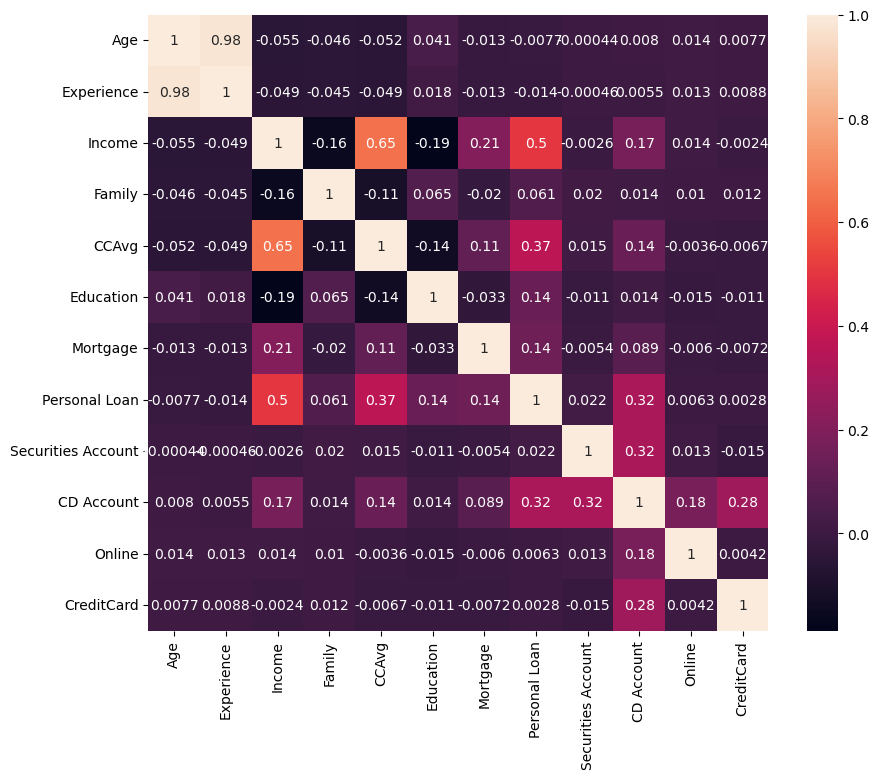

In [62]:
#To check the correlation using a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True)

In [63]:
data = data.drop(['Experience'], axis = 1)

In [64]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [65]:
# Checking the unique values in 'Education'. (1->Undergraduate, 2-Graduate, 3-Working Professional)
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [66]:
def Edu (x):
    if x == 1:
        return "Undergraduate Degree"
    if x == 2:
        return "Graduate Degree"
    if x == 3:
        return "Working Professional"

In [67]:
data['Educational-Level'] = data['Education'].apply(Edu)

In [68]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Educational-Level
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate Degree
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate Degree
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate Degree
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate Degree
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate Degree


In [69]:
#To find the unique values of Education-Level
data['Educational-Level'].unique()

array(['Undergraduate Degree', 'Graduate Degree', 'Working Professional'],
      dtype=object)

In [75]:
# Create a new Series called 'education_dis' containing the count of individuals in each educational group
education_dis = data.groupby('Educational-Level')['Age'].count()

In [76]:
education_dis 

Educational-Level
Graduate Degree         1403
Undergraduate Degree    2096
Working Professional    1501
Name: Age, dtype: int64

In [77]:
fig = ps.pie(data, values =education_dis, names =education_dis.index, title = 'Pie Chart')
fig.show()

In [79]:
#Finding the unique values for Income 
data['Income'].unique()


array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [80]:
# To count the number of times each value appears in the 'Securities Account' column
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [81]:
# To count the number of times each value appears in the 'CD Account' column
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [82]:
# Conditions for checking if customer holds Securities and CD account
def security(y):
    if(y['Securities Account'] == 1) & (y['CD Account'] == 1):
        return "Holds Securities & CD Account"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 0):
        return "Does not hold Securites & CD account"
    if(y['Securities Account'] == 1) & (y['CD Account'] == 0):
        return "Holds only Securities account"
    if(y['Securities Account'] == 0) & (y['CD Account'] == 1):
        return "Holds only CD account"

In [83]:
data['Account_Holder_Category'] = data.apply(security, axis = 1)

In [84]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Educational-Level,Account_Holder_Category
0,25,49,4,1.6,1,0,0,1,0,0,0,Undergraduate Degree,Holds only Securities account
1,45,34,3,1.5,1,0,0,1,0,0,0,Undergraduate Degree,Holds only Securities account
2,39,11,1,1.0,1,0,0,0,0,0,0,Undergraduate Degree,Does not hold Securites & CD account
3,35,100,1,2.7,2,0,0,0,0,0,0,Graduate Degree,Does not hold Securites & CD account
4,35,45,4,1.0,2,0,0,0,0,0,1,Graduate Degree,Does not hold Securites & CD account


In [92]:
acc_values = data['Account_Holder_Category'].value_counts()
acc_values.index

Index(['Does not hold Securites & CD account', 'Holds only Securities account',
       'Holds only CD account', 'Holds Securities & CD Account'],
      dtype='object')

In [93]:
fig = ps.pie(data, values = acc_values, names = acc_values.index, title = 'Pie Chart')
fig.show()

In [94]:
#Plotting a box plot. Personal Loan = 0 (Does not have personal loan), Personal Loan = 1 (Does have a Personal Loan)
ps.box(data, x = 'Education', y = 'Income', facet_col = 'Personal Loan')

C:\Users\thanu\AppData\Local\Temp\ipykernel_42104\4037503637.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\thanu\AppData\Local\Temp\ipykernel_42104\4037503637.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




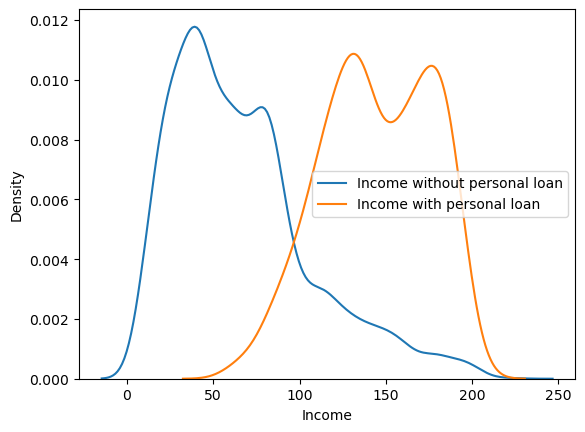

In [99]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'], hist = False,label = "Income without personal loan")

sns.distplot(data[data['Personal Loan'] == 1]['Income'], hist = False,label = "Income with personal loan")
plt.legend()

In [100]:
# Defining a function to plot the distribution of a column, grouped by another column
def plot(col1, col2, label1, label2, title):
    sns.distplot(data[data[col2] == 0][col1], hist = False,label =label1)
    
    sns.distplot(data[data[col2] == 1][col1], hist = False,label = label2)
    
    plt.legend()
    plt.title(title)

C:\Users\thanu\AppData\Local\Temp\ipykernel_42104\2213636516.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\thanu\AppData\Local\Temp\ipykernel_42104\2213636516.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




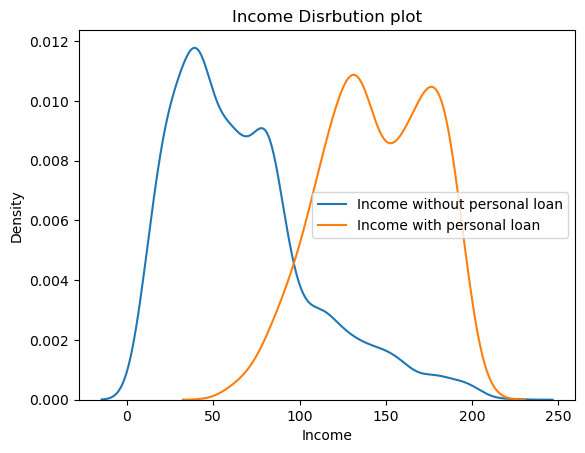

In [98]:
plot('Income', 'Personal Loan', "Income without personal loan", "Income with personal loan", "Income Disrbution plot")


C:\Users\thanu\AppData\Local\Temp\ipykernel_42104\2213636516.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\thanu\AppData\Local\Temp\ipykernel_42104\2213636516.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




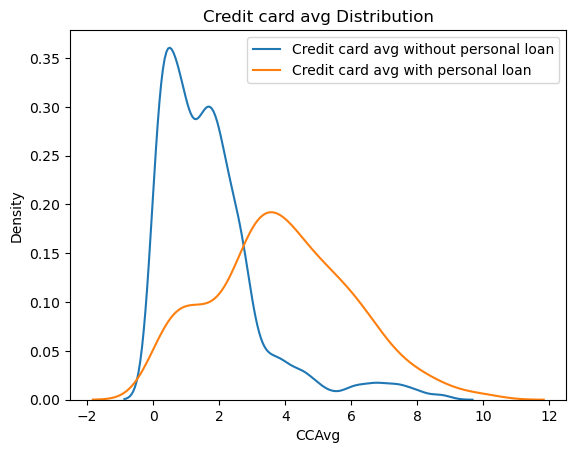

In [101]:
plot('CCAvg','Personal Loan',
     'Credit card avg without personal loan',
     'Credit card avg with personal loan',
     'Credit card avg Distribution')

In [105]:
col = ['Securities Account',
      'Online', 
      'Account_Holder_Category',
      'CreditCard']

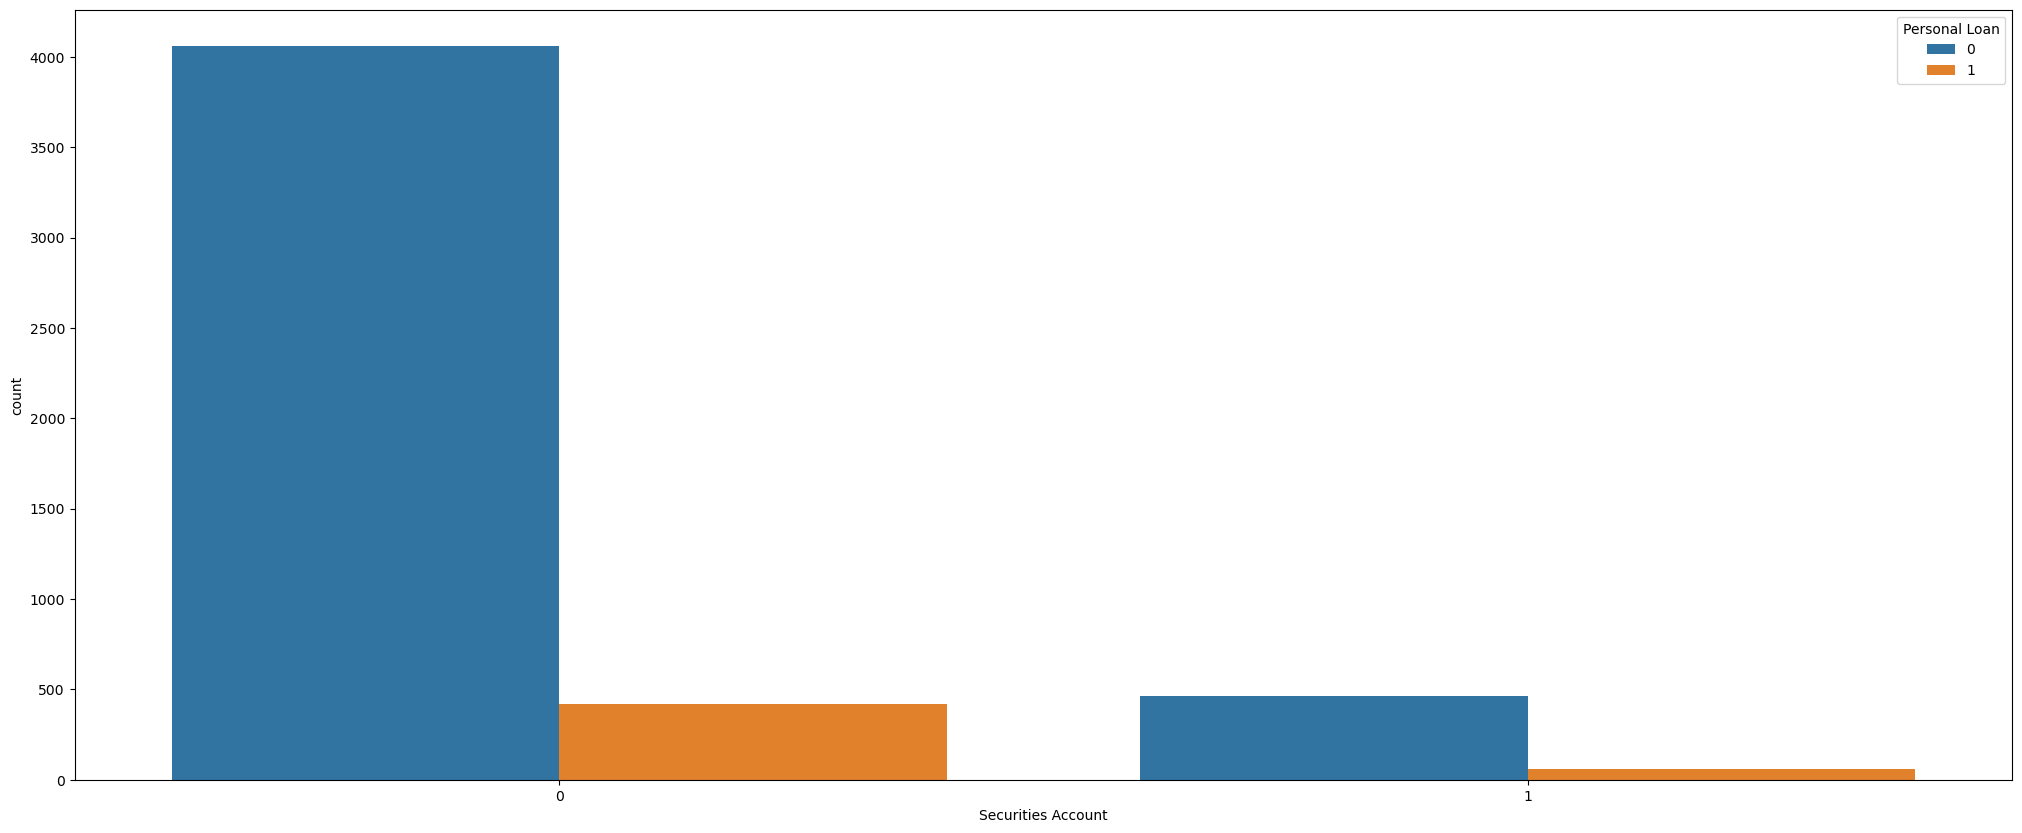

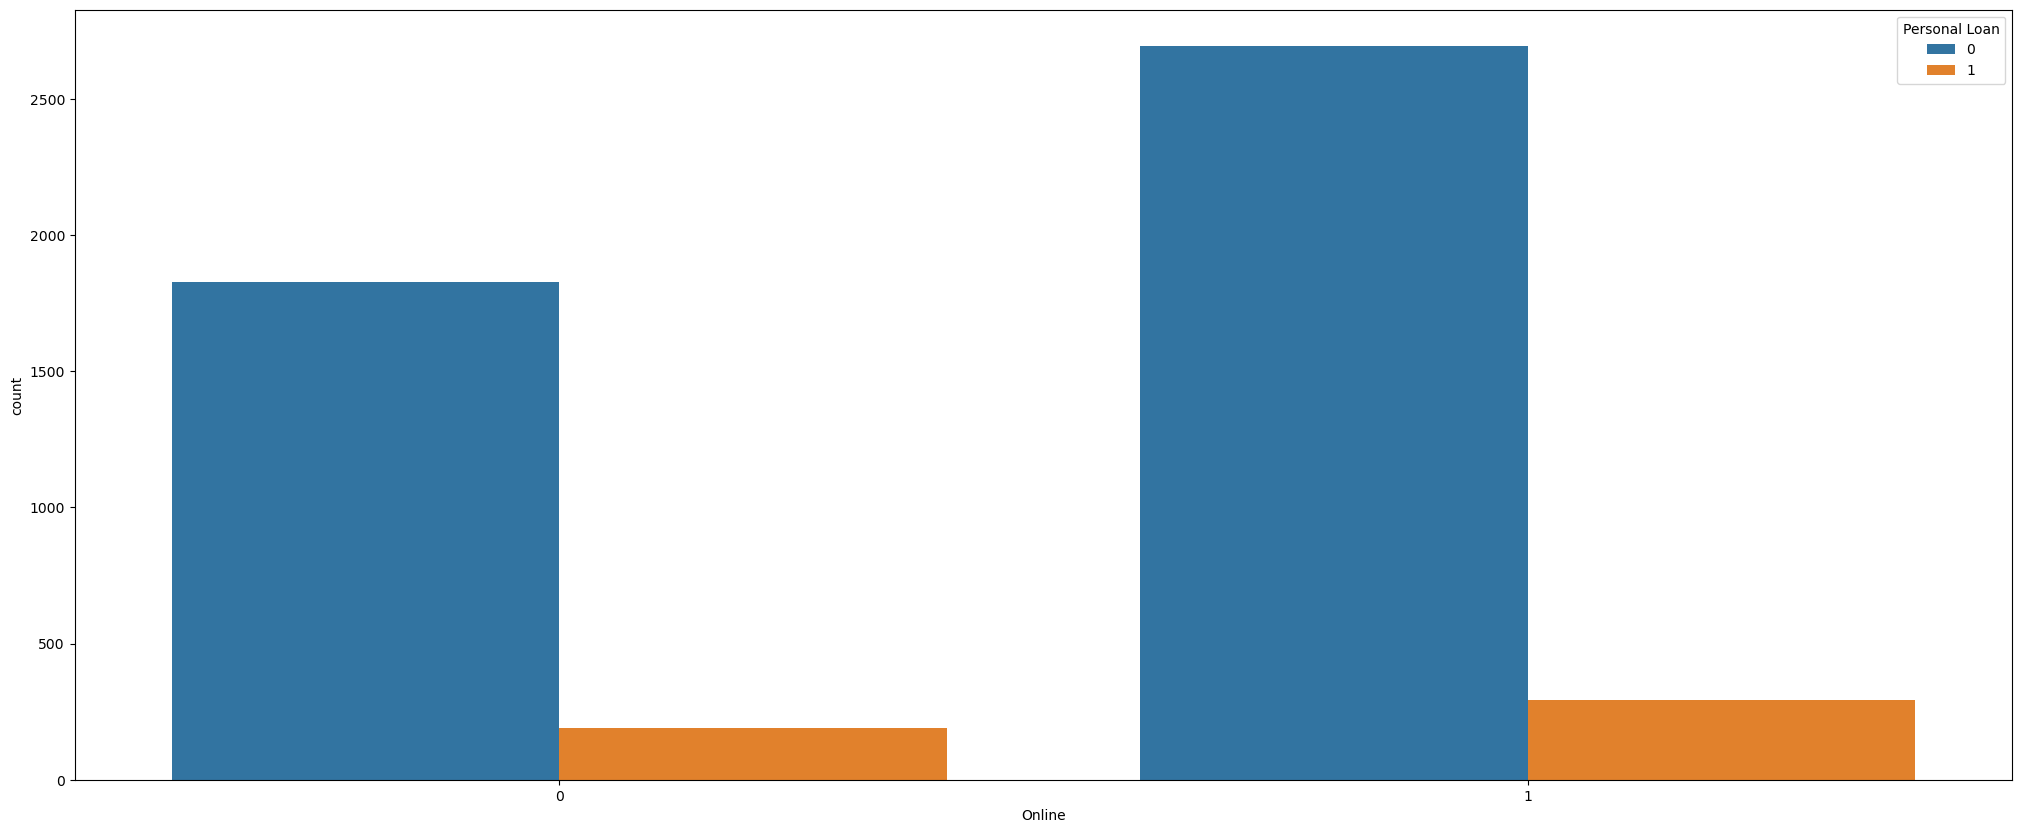

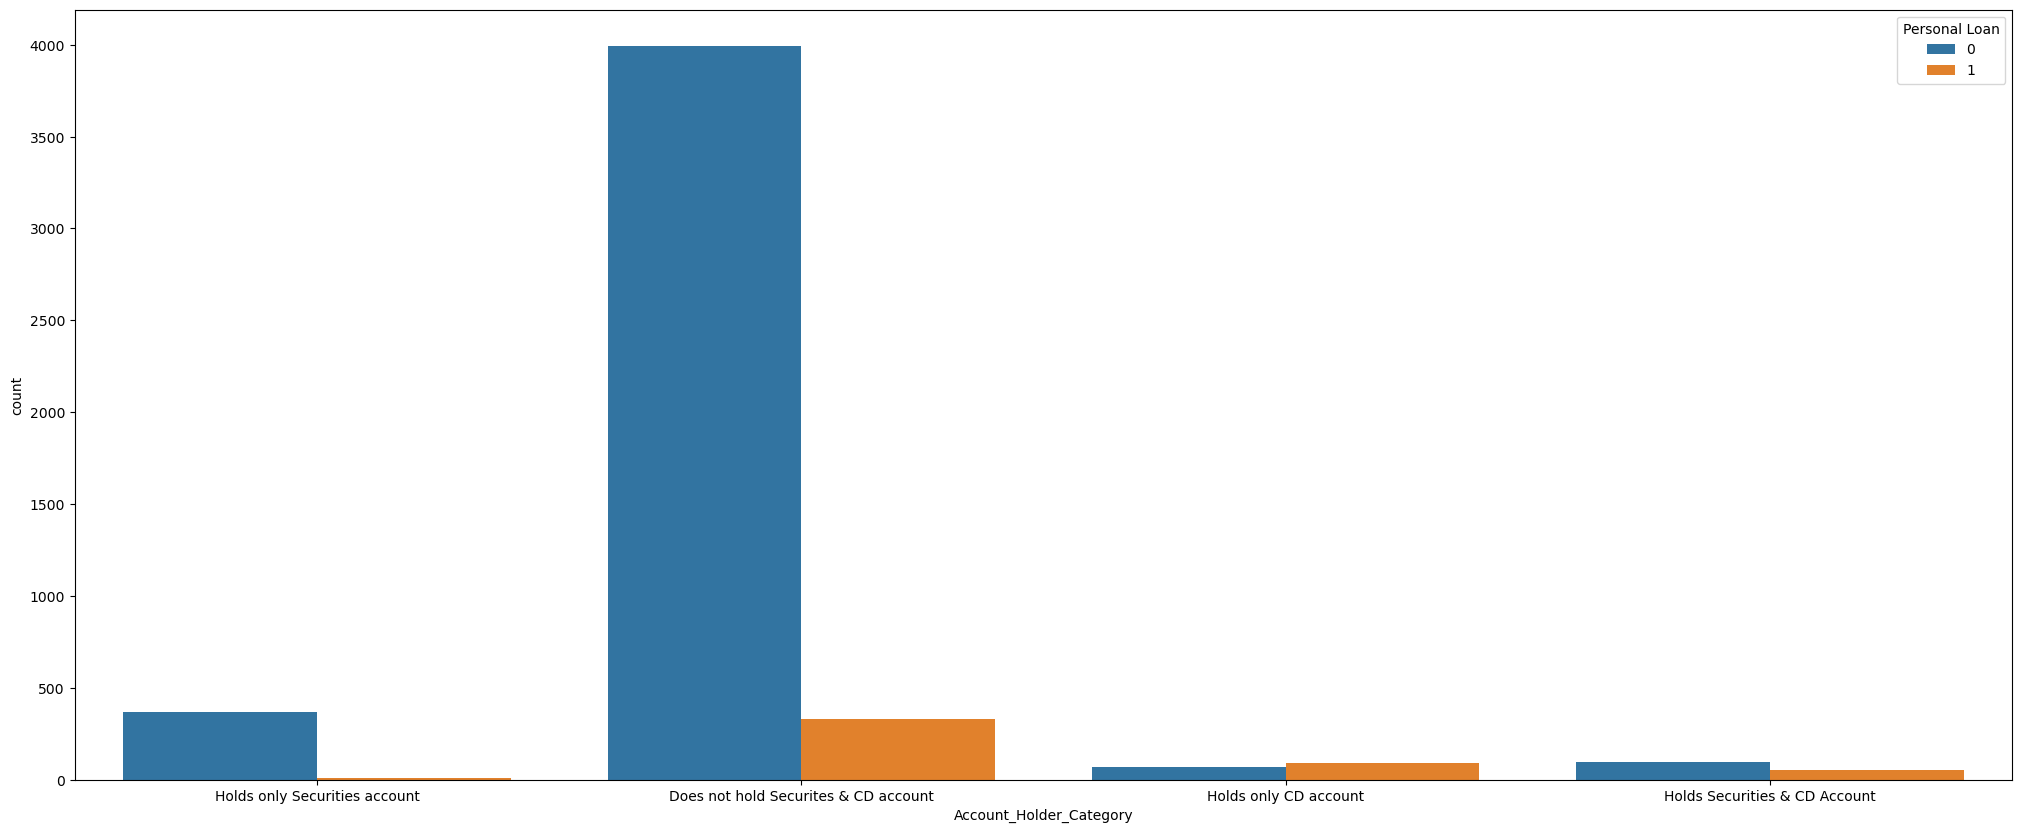

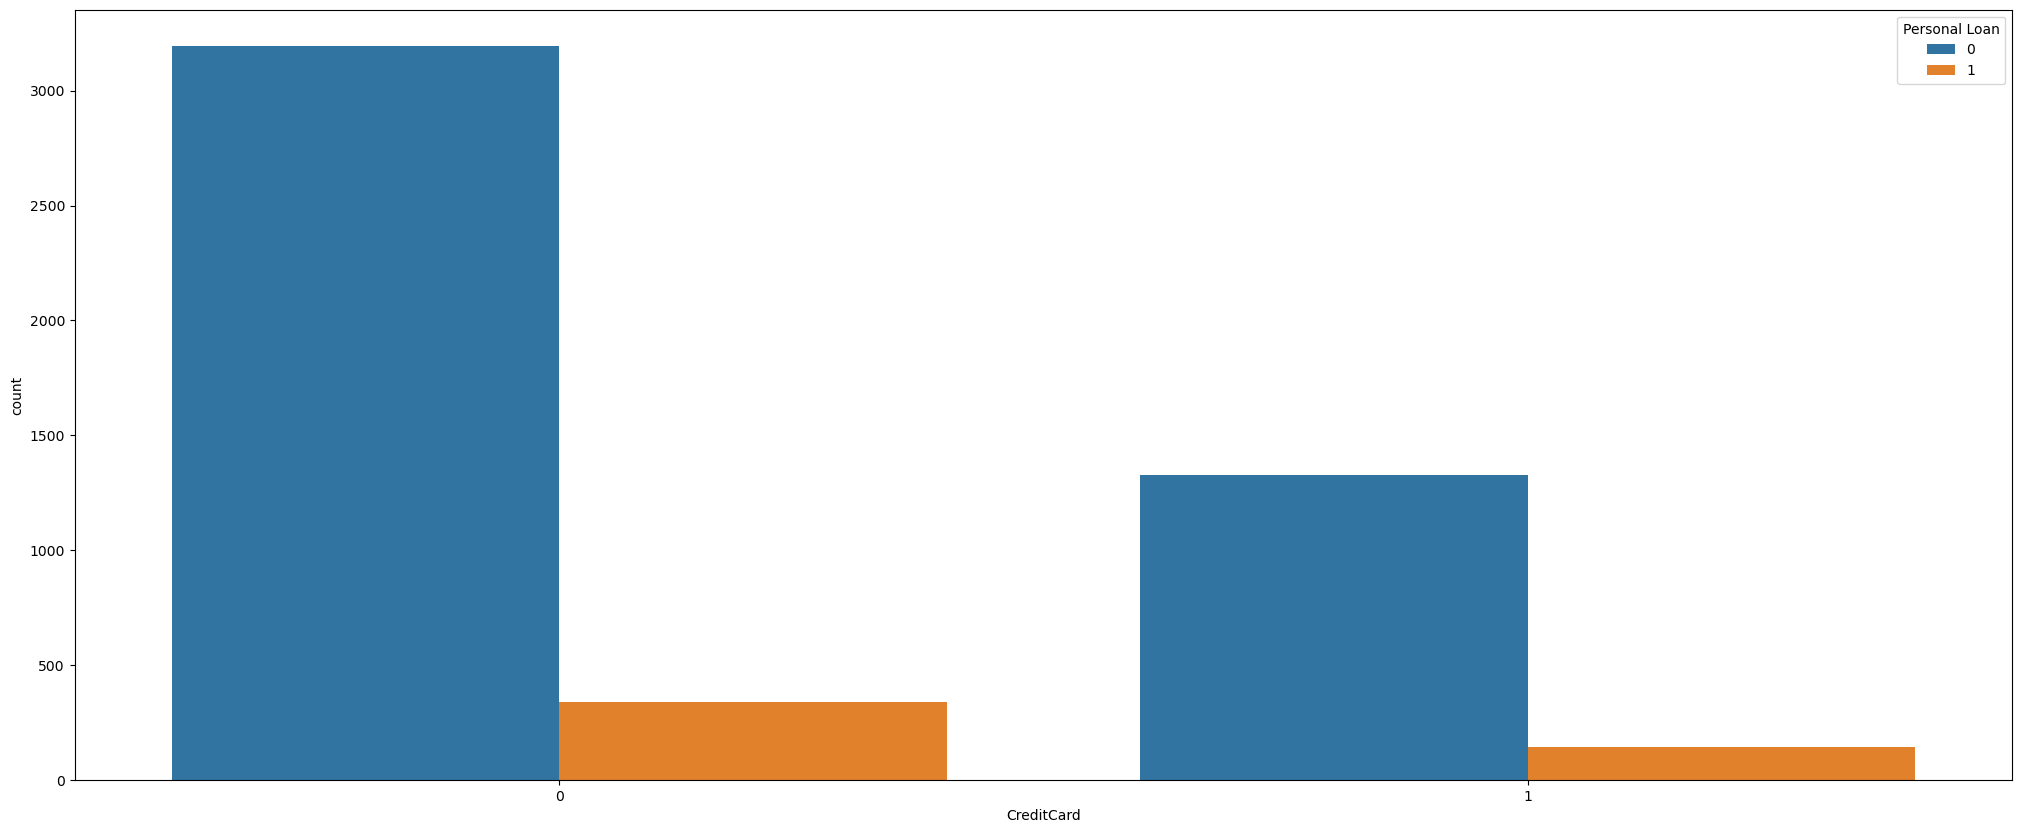

In [110]:
for i in col:
    plt.figure(figsize = (25,10))
    sns.countplot(x = i, data = data, hue = 'Personal Loan')

In [111]:
from scipy.stats import zscore

In [114]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

IQR = q3 - q1
print(IQR)

Age                    20.0
Income                 59.0
Family                  2.0
CCAvg                   1.8
Education               2.0
Mortgage              101.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              1.0
dtype: float64


C:\Users\thanu\AppData\Local\Temp\ipykernel_42104\722697894.py:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\thanu\AppData\Local\Temp\ipykernel_42104\722697894.py:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [115]:
#To check the skewness
from sklearn.preprocessing import PowerTransformer

C:\Users\thanu\AppData\Local\Temp\ipykernel_42104\1470636686.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




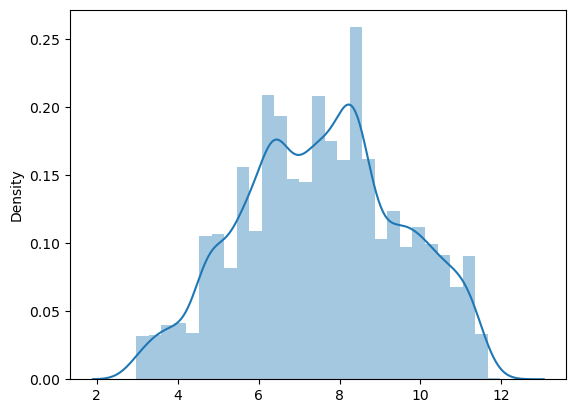

In [116]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data['Income'].values.reshape(-1,1))
Income = pt.transform(data['Income'].values.reshape(-1,1))
sns.distplot(Income)
plt.show()